In [1]:
# Autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


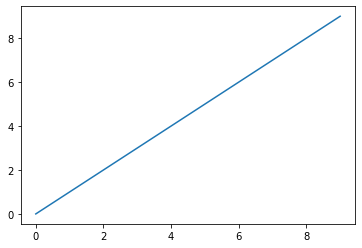

In [3]:
# Verify plotting works
plot(range(10))

In [4]:
# Verify that we're using the correct kernel
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [6]:
# Add path to geostacks
import sys, os
sys.path.insert(0, '../../')

In [6]:
pwd

'/home/espg/software/GeoStacks/doc/examples'

In [7]:
# add path so it's discoverable
sys.path.insert(0, os.path.abspath('../../_build/pip_packages/lib/python3.8/site-packages/'))

In [8]:
# Build the ipyleaflet outside of nix
!{sys.executable} -m pip install --prefix="../../_build/pip_packages" ipyleaflet==0.13.5

  Using cached ipyleaflet-0.13.5-py2.py3-none-any.whl (4.9 MB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Using cached traittypes-0.2.1-py2.py3-none-any.whl (8.6 kB)
  Using cached Shapely-1.7.1-cp38-cp38-manylinux1_x86_64.whl (1.0 MB)
  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached Jinja2-3.0.0-py3-none-any.whl (133 kB)
  Using cached nbformat-5.1.3-py3-none-any.whl (178 kB)
  Using cached jupyterlab_widgets-1.0.0-py3-none-any.whl (243 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached notebook-6.3.0-py3-none-any.whl (9.5 MB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached argon2_cffi-20.1.0-cp35-abi3-manylinux1_x86_64.whl (97 kB)
  Using cached prometheus_client-0.10.1-py2.py3-none-any.whl (55 kB)
  Using cached terminado-0.9.5-py3-none-any.whl (14 kB)
  Using cached Send2Trash-1.5.0-py3-none-any.whl (12 kB)
  Using cached

In [8]:
import ipyleaflet

Traceback (most recent call last):
  File "/nix/store/knfs9dgfr3nd115vlpml2ka7f41m4y77-python3.8-notebook-6.3.0/bin/.jupyter-nbextension-wrapped", line 9, in <module>
    sys.exit(main())
  File "/nix/store/hyn2bg9zw5bbaghaqar2ss245wj40z1c-python3.8-jupyter_core-4.7.1/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/nix/store/d48hfzvy4jhr6p3y325j75fir7cw3ipl-python3.8-traitlets-5.0.5/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/nix/store/knfs9dgfr3nd115vlpml2ka7f41m4y77-python3.8-notebook-6.3.0/lib/python3.8/site-packages/notebook/nbextensions.py", line 980, in start
    super().start()
  File "/nix/store/hyn2bg9zw5bbaghaqar2ss245wj40z1c-python3.8-jupyter_core-4.7.1/lib/python3.8/site-packages/jupyter_core/application.py", line 243, in start
    self.subapp.start()
  File "/nix/store/knfs9dgfr3nd115v

In [10]:
import ipywidgets

In [9]:
from ipyleaflet import Map, Marker

center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

In [13]:
display(m)


Map(bottom=690979.0, center=[52.20476633165758, 360.13535499572754], controls=(ZoomControl(options=['position'…

In [11]:
ipyleaflet.__version__

'0.13.5'

In [12]:
!jupyter-nbextentions list

/nix/store/6kxhv6s36p5l3jylxzwvqn4qm3fjkb63-bash-interactive-4.4-p23/bin/bash: jupyter-nbextentions: command not found


In [8]:
import ipyleaflet

In [9]:
# Load geostacks
from geostacks import SpatialIndexLS8

# Load UI components
import ipyleaflet as ilfl
import ipywidgets as iwg

In [10]:
ls8_index = SpatialIndexLS8('../../LANDSAT_8_C1_cornerpoints.csv')
ls8_index.read()
print(ls8_index.footprint)
print('------------------')

query_pt = [-50., 69.]
idxs = ls8_index.query_pathrow(query_pt)
print(ls8_index.footprint.loc[idxs])

       path  row    lon_CTR    lat_CTR  \
0         1    2  -4.197763  80.002493   
1         1    3 -10.561457  79.111023   
2         1    4 -15.970556  78.118527   
3         1    5 -20.471403  77.048224   
4         1    6 -24.338152  75.902095   
...     ...  ...        ...        ...   
21898   233  242  44.207091  80.008794   
21899   233  243  36.728885  80.760793   
21900   233  244  28.123821  81.338812   
21901   233  245  18.551148  81.705630   
21902   233  248 -11.314870  81.338539   

                                                geometry  
0      POLYGON ((-2.73002 81.20570, 2.59456 79.71746,...  
1      POLYGON ((-9.99477 80.33234, -4.15668 78.95795...  
2      POLYGON ((-16.04544 79.34425, -10.01855 78.079...  
3      POLYGON ((-20.97844 78.26901, -14.98803 77.105...  
4      POLYGON ((-25.13378 77.11339, -19.30751 76.041...  
...                                                  ...  
21898  POLYGON ((51.28225 80.15426, 45.38953 78.79931...  
21899  POLYGON ((44.273

In [11]:
class geostacks_ui():
    
    def __init__(self, zoom=4, query_pt=[-50., 69.], spatial_index=None):
        
        self.zoom = zoom
        self.query_pt = query_pt
        self.mainmap = None
        self.marker = None
        self.idxs = None
        self.ui_title = None
        self.prlist = []
        self.menuleft = None     # path / row menu
        self.pr_selection = None
        self.map_polygon = None
        self.spatial_index = spatial_index
        self.output = None       # print message output (unused for now)
        self.results = None      # store results (unused for now)
        
    def init_panelleft(self):
        self.ui_title = iwg.HTML("<h2>Drag the marker to your region of interest</h2>")
        self.idxs = self.spatial_index.query_pathrow(self.query_pt)
        self.prlist = [('{:03d}/{:03d}'.format(self.spatial_index.footprint.loc[i, 'path'], self.spatial_index.footprint.loc[i, 'row']) ,i) for i in self.idxs]
        self.menuleft = iwg.Select(options=self.prlist, description='Path/Row:', rows=15)
        
    def init_map(self):
        self.mainmap = ilfl.Map(basemap=ilfl.basemaps.Gaode.Satellite, center=[self.query_pt[-1], self.query_pt[0]], zoom=self.zoom)
        self.marker = ilfl.Marker(location=[self.query_pt[-1], self.query_pt[0]], draggable=True)
        self.mainmap.add_layer(self.marker)
        self.pr_selection = self.idxs[0]
        self.map_polygon = ilfl.WKTLayer(wkt_string=self.spatial_index.footprint.loc[self.pr_selection].geometry.wkt)
        self.mainmap.add_layer(self.map_polygon)
        
    def gen_ui(self, spatial_index=None):
        if self.spatial_index is None:
            self.spatial_index = spatial_index
        
        self.init_panelleft()
        self.init_map()
        
        self.marker.observe(self._on_location_changed, 'location')
        self.menuleft.observe(self._on_menuleft_selection_changed, names='value')
        leftside = iwg.VBox([self.ui_title, self.menuleft])
        leftside.layout.align_items = 'center'
        return iwg.AppLayout(left_sidebar=leftside, center=self.mainmap)

    # ==== leftmenu update when map marker loc changes
    
    def _on_location_changed(self, event):
        self.query_pt = [self.marker.location[-1], self.marker.location[0]]
        self.idxs = self.spatial_index.query_pathrow(self.query_pt)
        self.prlist = [('{:03d}/{:03d}'.format(self.spatial_index.footprint.loc[i, 'path'], self.spatial_index.footprint.loc[i, 'row']) ,i) for i in self.idxs]
        self.menuleft.options = self.prlist
        
    # ==== map polygon update when leftmenu selection changes

    def _on_menuleft_selection_changed(self, change):
        self.pr_selection = change['new']
        self.map_polygon.wkt_string=self.spatial_index.footprint.loc[self.pr_selection].geometry.wkt


In [12]:
cpanel = geostacks_ui(spatial_index=ls8_index)
cpanel.gen_ui()

AppLayout(children=(VBox(children=(HTML(value='<h2>Drag the marker to your region of interest</h2>'), Select(d…